In [24]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from Helper_Code import *

In [25]:
# Uploading the DataSet
DataFrames = UploadDataSet(base_directory="dataframes_list.pkl.gz")

In [26]:
# Time Series of the u_fluc for all points
u_fluc_allpoints = UploadDataSet(base_directory="ufluc_TS_Allpoints_Full.pkl.gz")

# Time Series of the w_fluc for all points
w_fluc_allpoints = UploadDataSet(base_directory="wfluc_TS_Allpoints_Full.pkl.gz")

In [27]:
u_fluc_allpoints

,ufluc_0,ufluc_1,ufluc_2,ufluc_3,ufluc_4,ufluc_5,ufluc_6,ufluc_7,ufluc_8,ufluc_9,...,ufluc_17990,ufluc_17991,ufluc_17992,ufluc_17993,ufluc_17994,ufluc_17995,ufluc_17996,ufluc_17997,ufluc_17998,ufluc_17999
0,-0.269271,-0.255965,-0.238435,-0.245486,-0.291523,-0.287073,-0.235291,-0.284112,-0.327965,-0.303452,...,-0.909106,-0.875879,-0.827945,-0.593318,-0.491752,-0.166139,-0.073013,-0.241682,-0.439731,-0.271324
1,-0.141222,-0.164618,-0.182014,-0.279711,-0.341821,-0.312954,-0.255448,-0.272116,-0.253237,-0.215779,...,0.545830,0.561386,0.457346,0.330713,0.071968,-0.470807,-0.914070,-1.178380,-1.301130,-1.581850
2,-0.238818,-0.109862,-0.079688,-0.140600,-0.183472,-0.195055,-0.219829,-0.245548,-0.269196,-0.268650,...,0.600813,0.445962,0.202001,0.330641,0.535985,0.642128,0.455844,0.079230,-0.133263,0.208997
3,0.011422,0.025895,0.015766,-0.017601,-0.000889,0.012046,-0.067655,-0.117857,-0.066583,-0.061815,...,0.954750,0.783363,0.749987,0.704346,0.766578,0.749439,0.811599,0.939170,1.063350,1.042870
4,0.101353,0.073682,0.076198,0.104342,0.111731,0.071573,0.066887,0.092761,0.087886,0.032795,...,0.876701,0.897481,0.932943,1.004830,1.061500,1.021210,1.054960,1.086980,1.232590,1.182200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.020805,0.032746,-0.007464,-0.054865,-0.042532,-0.015130,-0.014778,-0.044926,-0.071703,-0.100404,...,0.079562,0.036230,0.050163,0.165454,0.196787,0.269551,0.301938,0.518497,0.716519,0.715124
796,0.161092,0.128180,0.082142,0.054520,0.030620,0.020895,0.010489,0.039596,0.024122,0.020183,...,0.501647,0.512633,0.537565,0.476101,0.377829,0.267114,0.307567,0.336963,0.332691,0.381803
797,-0.047668,0.008973,-0.006049,-0.019906,0.036400,0.071285,0.040512,-0.007224,-0.028238,-0.008751,...,-0.267359,-0.323467,-0.346295,-0.239307,-0.057323,-0.019149,-0.047779,0.027432,0.133455,0.177106
798,0.177394,0.067986,0.069989,0.111957,0.085255,0.047191,0.033131,0.002675,-0.019908,0.016785,...,-0.571490,-0.633546,-0.658443,-0.520714,-0.481937,-0.527405,-0.713181,-0.716425,-0.656164,-0.500719


In [28]:
X, Y = IndexToLocation(DataFrames, np.arange(18000))
X = X.values.reshape(150, 120)
Y = Y.values.reshape(150, 120)

In [29]:
# A refernce Velocity
U_ref = 3.5

# a paramter to vary; alpha in [0, 1]
alpha = 0.25

In [30]:
u_critical = alpha*U_ref
u_critical

0.875

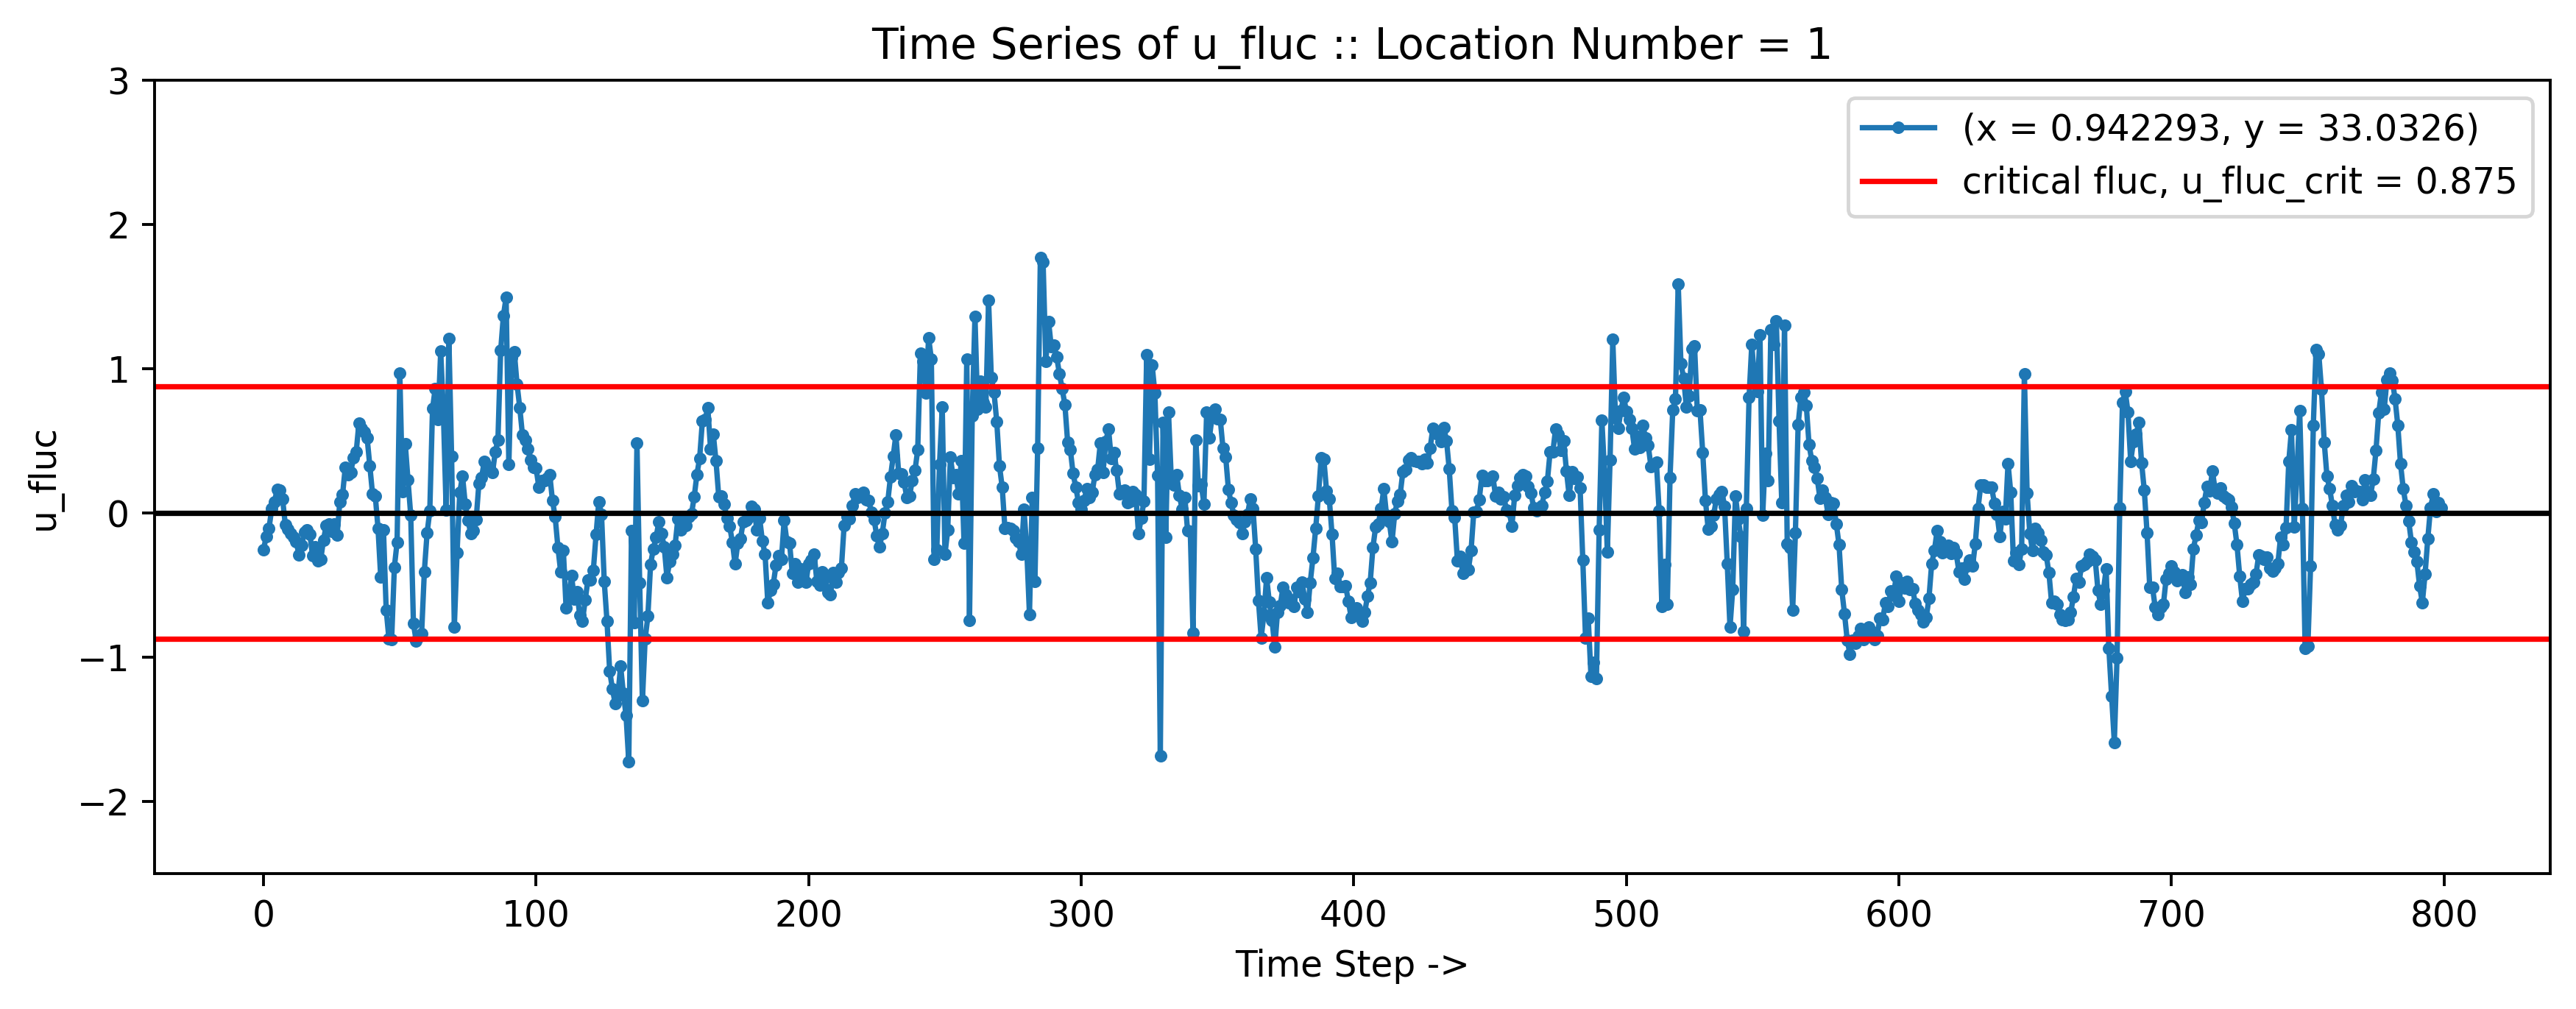

In [31]:
Index = 1

VarName = "u_fluc"

TS_var = u_fluc_allpoints[f"ufluc_{Index}"]
TS_var2 = w_fluc_allpoints[f"wfluc_{Index}"]

pts = IndexToLocation(DataFrames, Index)

# Plot of the Time Series
plt.plot(TS_var, marker='.', markersize=5, linestyle='-', label=f"(x = {pts[0]}, y = {pts[1]})")

plt.axhline(y= 0, color = 'k')
plt.axhline(y= u_critical, color = 'r')
plt.axhline(y=-u_critical, color = 'r', label = f'critical fluc, u_fluc_crit = {u_critical}')

plt.gcf().set_size_inches(12, 4) 
plt.gcf().set_dpi(350)  # Set DPI for high quality


plt.title(f"Time Series of {VarName} :: Location Number = {Index}")
plt.ylabel(f"{VarName}")
plt.xlabel("Time Step ->")
plt.legend()

plt.ylim(-2.5, 3)

plt.show()

In [32]:
#TS_var --> has the u_fluc; for the Given Index
#TS_var2 -->has the w_fluc; for the Given Index

# Computing the RMS values

sum_uu = sum_uw = sum_ww =0

count = 0
for i in range(np.size(TS_var)):
    if (TS_var[i] >= u_critical) or (TS_var[i] <= -u_critical):
        sum_uu += TS_var[i]*TS_var[i]
        sum_uw += TS_var[i]*TS_var2[i]
        sum_ww += TS_var2[i]*TS_var2[i]
        count+=1

print(f"sum_uu = {sum_uu}\nsum_uw = {sum_uw}\nsum_ww = {sum_ww}")

sum_uu = 102.53135603041201
sum_uw = 3.942368738256169
sum_ww = 3.3273962598645794


$$\text{RMS\_u} = \sqrt{\frac{1}{n}\Sigma{u^2}}$$  

$$\text{RMS\_w} = \sqrt{\frac{1}{n}\Sigma{w^2}}$$  

$$\text{RMS\_u\_w} = \sqrt{\frac{1}{n}\Sigma{uw}}$$  

Where $n$ is the number of |u_fluc| exceeding |u_critical| 

In [33]:
RMS_u = np.sqrt(sum_uu/count)
RMS_w = np.sqrt(sum_ww/count)
RMS_u_w=np.sqrt(sum_uw/count)

print(RMS_u, RMS_w, RMS_u_w)

1.1615062590764813 0.20924036354169398 0.2277570479080542


In [34]:
np.arange(0,0.51,0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ])